<a href="https://colab.research.google.com/github/lunu5/diveintocode-ml/blob/master/Classification_of_irises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Problem 1] Select features and categories for practice

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.datasets import load_iris
data = load_iris()
x = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)
x.columns = [data.feature_names]
y.columns = ['Species']
df = pd.concat([x, y], 1)
df = df.drop(df[df['Species'] == 0].index)
df = df.drop([df.columns[1], df.columns[3]], 1)
df

,"(sepal length (cm),)","(petal length (cm),)",Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


#Problem 2] Data analysis

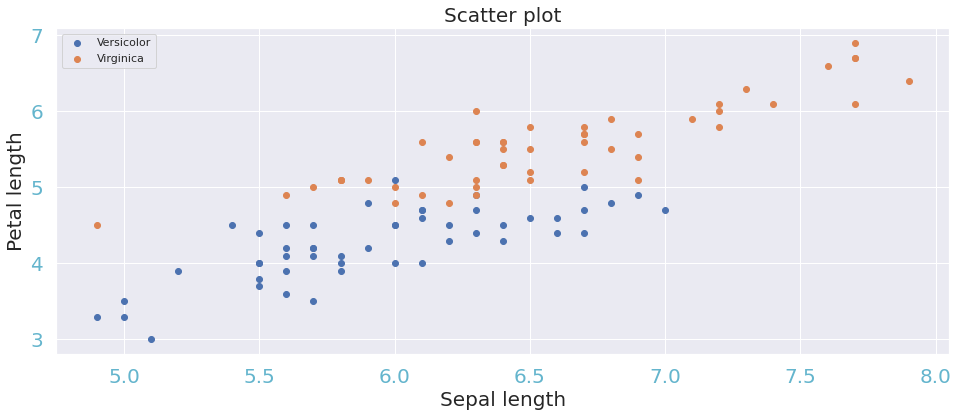

In [2]:
plt.figure(figsize = (16, 6))
plt.scatter(df.iloc[:50, 0], df.iloc[:50, 1], label = 'Versicolor')
plt.scatter(df.iloc[50:, 0], df.iloc[50:, 1], label = 'Virginica')
plt.xlabel('Sepal length', fontsize = 20)
plt.ylabel('Petal length', fontsize = 20)
plt.legend()
plt.tick_params(direction = 'out', length = 10, width = 1, colors = 'c', labelsize = 20)
plt.title('Scatter plot', fontsize = 20)
plt.show()

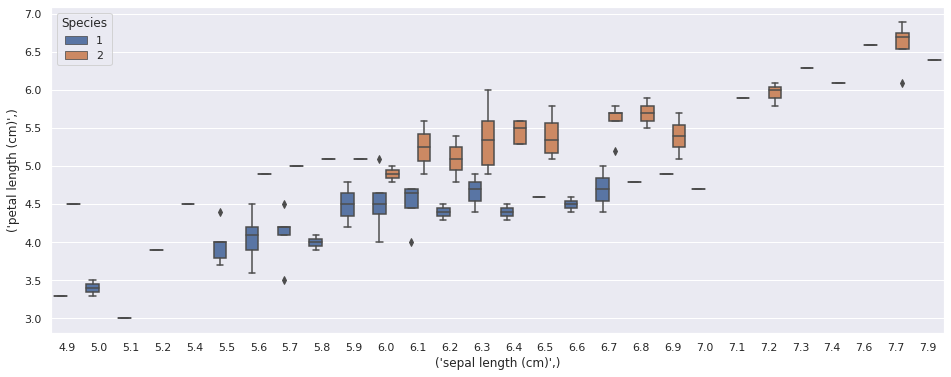

In [3]:
plt.figure(figsize = (16, 6))
sns.boxplot(x = df[df.columns[0]], y = df[df.columns[1]], hue = df['Species'])
plt.show() 

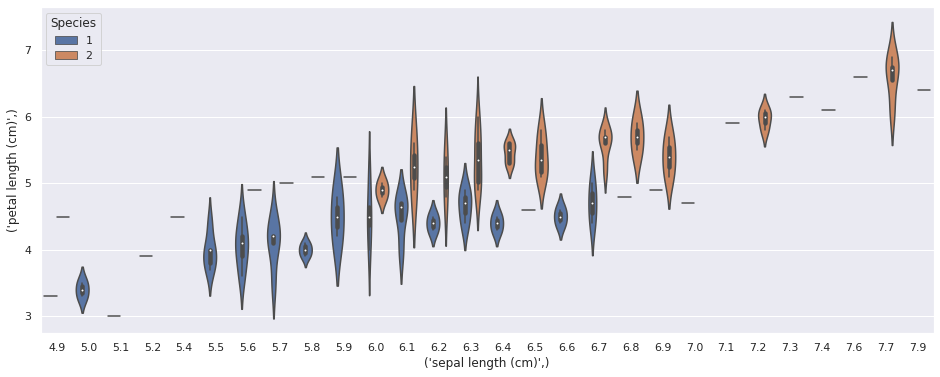

In [4]:
plt.figure(figsize = (16, 6))
sns.violinplot(x = df[df.columns[0]], y = df[df.columns[1]], hue = df['Species'])
plt.show() 

#[Problem 3] Division of preprocessing/training data and verification data

In [5]:
from sklearn.model_selection import train_test_split
x = np.array(df.drop(df.columns[2], 1))
y = np.array(df['Species'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

#[Problem 4] Pretreatment/Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test);

#[Problem 5] Learning and estimation

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neigh1 = KNeighborsClassifier(n_neighbors = 1)
neigh1.fit(x_train, y_train)
nn1 = neigh1.predict(x_test)

neigh2 = KNeighborsClassifier(n_neighbors = 3)
neigh2.fit(x_train, y_train)
nn3 = neigh2.predict(x_test)

neigh3 = KNeighborsClassifier()
neigh3.fit(x_train, y_train)
nn5 = neigh3.predict(x_test)

#[Problem 6] Evaluation

##Calculate 4 types of indicators using scikit-learn

###**Accuracy**

####Score of 1-nn

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, nn1)

0.8

####Score of 3-nn

In [9]:
accuracy_score(y_test, nn3)

0.84

####Score of 5-nn

In [10]:
accuracy_score(y_test, nn5)

0.84

###**Precision**

####Score of 1-nn

In [11]:
from sklearn.metrics import precision_score
precision_score(y_test, nn1, average=None, zero_division=1)

array([0.76923077, 0.83333333])

####Score of 3-nn

In [12]:
precision_score(y_test, nn3, average=None, zero_division=1)

array([0.83333333, 0.84615385])

####Score of 5-nn

In [13]:
precision_score(y_test, nn5, average=None, zero_division=1)

array([0.83333333, 0.84615385])

###**Recall**

####Score of 1-nn

In [14]:
from sklearn.metrics import recall_score
recall_score(y_test, nn1, average=None, zero_division=1)

array([0.83333333, 0.76923077])

####Score of 3-nn

In [15]:
recall_score(y_test, nn3, average=None, zero_division=1)

array([0.83333333, 0.84615385])

####Score of 5-nn

In [16]:
recall_score(y_test, nn5, average=None, zero_division=1)

array([0.83333333, 0.84615385])

###**F-measure**

####Score of 1-nn

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test, nn1, zero_division=1)

0.8

####Score of 3-nn

In [18]:
f1_score(y_test, nn3, zero_division=1)

0.8333333333333334

####Score of 5-nn

In [19]:
f1_score(y_test, nn5, zero_division=1)

0.8333333333333334

##Display the confusion matrix using scikit-learn

####Score of 1-nn

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, nn1)

array([[10,  2],
       [ 3, 10]])

####Score of 3-nn

In [21]:
confusion_matrix(y_test, nn3)

array([[10,  2],
       [ 2, 11]])

####Score of 5-nn

In [22]:
m_nn5 = confusion_matrix(y_test, nn5)
m_nn5

array([[10,  2],
       [ 2, 11]])

##Briefly research and summarize in writing the meaning of the four types of index values


> Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class. By definition a confusion matrix *C* is such that *C<sub>i,j<sub>* is equal to the number of observations known to be in group  and predicted to be in group.


> The count of true negatives is *C<sub>0,0<sub>*, false negatives is *C<sub>1,0<sub>*, true positives is *C<sub>1,1<sub>* and false positives is *C<sub>0,1<sub>*. 





#[Problem 7] Visualization

In [23]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

##1-nn

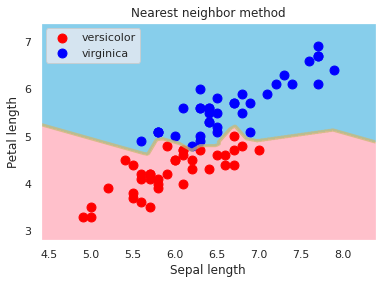

In [24]:
decision_region(x_train, y_train, KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train), title='Nearest neighbor method', xlabel='Sepal length', ylabel='Petal length')

##3-nn

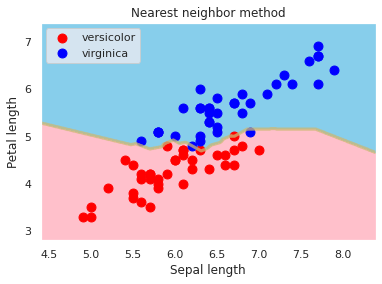

In [25]:
decision_region(x_train, y_train, KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train), title='Nearest neighbor method', xlabel='Sepal length', ylabel='Petal length')

##5-nn

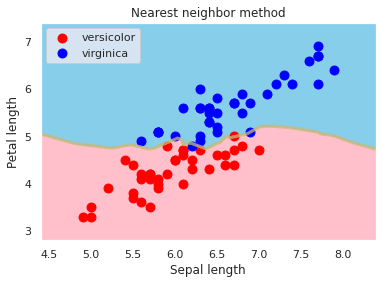

In [26]:
decision_region(x_train, y_train, KNeighborsClassifier().fit(x_train, y_train), title='Nearest neighbor method', xlabel='Sepal length', ylabel='Petal length')

#[Problem 8] Learning by other methods

##Nearest neighbor method
*See from problem 5 to 7*

##Logistic regression

###Learning and estimation

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)
logis = clf.predict(x_test)

###Evaluation

In [28]:
f1_score(y_test, logis, zero_division=1)

0.8461538461538461

###Visualization

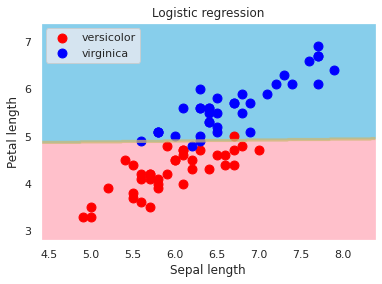

In [29]:
decision_region(x_train, y_train, LogisticRegression().fit(x_train, y_train), title='Logistic regression', xlabel='Sepal length', ylabel='Petal length')

###Confusion matrix

In [30]:
m_logis = confusion_matrix(y_test, logis)
m_logis

array([[11,  1],
       [ 3, 10]])

##SVM

###Learning and estimation

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC()).fit(x_train, y_train)
svm = clf.predict(x_test)

###Evaluation

In [32]:
f1_score(y_test, svm, zero_division=1)

0.8333333333333334

###Visualization

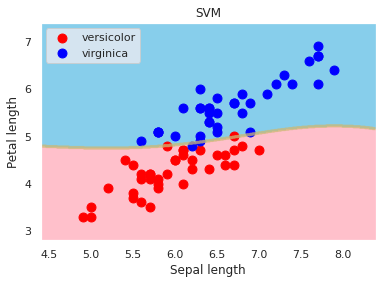

In [33]:
decision_region(x_train, y_train, SVC().fit(x_train, y_train), title='SVM', xlabel='Sepal length', ylabel='Petal length')

###Confusion matrix

In [34]:
m_svm = confusion_matrix(y_test, svm)
m_svm

array([[10,  2],
       [ 2, 11]])

##Decision tree

###Learning and estimation

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
cross_val_score(clf, x_train, y_train)
dtree = clf.predict(x_test)

###Evaluation

In [36]:
f1_score(y_test, dtree, zero_division=1)

0.8333333333333334

###Visualization

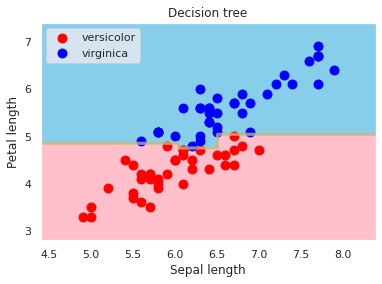

In [37]:
decision_region(x_train, y_train, DecisionTreeClassifier().fit(x_train, y_train), title='Decision tree', xlabel='Sepal length', ylabel='Petal length')

###Confusion matrix

In [38]:
m_dtree = confusion_matrix(y_test, dtree)
m_dtree

array([[10,  2],
       [ 2, 11]])

##Random forest

###Learning and estimation

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(x_train, y_train)
ranf = clf.predict(x_test)

###Evaluation

In [40]:
f1_score(y_test, ranf, zero_division=1)

0.7826086956521738

###Visualization

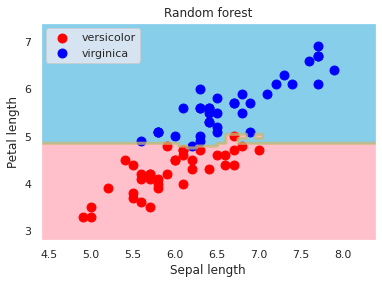

In [41]:
decision_region(x_train, y_train, RandomForestClassifier().fit(x_train, y_train), title='Random forest', xlabel='Sepal length', ylabel='Petal length')

###Confusion matrix

In [42]:
m_ranf = confusion_matrix(y_test, ranf)
m_ranf

array([[ 9,  3],
       [ 2, 11]])

##Comparation

In [43]:
table = np.hstack((m_nn5.reshape(4, 1), m_logis.reshape(4, 1), m_svm.reshape(4, 1), m_dtree.reshape(4, 1), m_ranf.reshape(4, 1)))
table = pd.DataFrame(table, index = ['00', '01', '10', '11'], columns = ['Nearest neighbor', 'Logistic regression', 'SMV', 'Decision tree', 'Random forest'])

In [44]:
table

,Nearest neighbor,Logistic regression,SMV,Decision tree,Random forest
00,10,11,10,10,9
01,2,1,2,2,3
10,2,3,2,2,2
11,11,10,11,11,11


The table shows that Logistic regression is better for estimate the true negatives however, it ií also the worst for the true positives. The amount of samples are quite small so the result might have large variation.

#[Problem 9] (Advanced task) Comparison with and without standardization

#【問題10】（アドバンス課題）すべての目的変数を使用して精度が高い手法